# Nueral Network for Handwritten Digit recognition: Multiclass classification


#### Problem statement

In this project we will use `Neural Network` to recognize two handwritten digits, Zero to Nine (0-9)

Let us import some important libraries 


## Packages

In [135]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.losses import  SparseCategoricalCrossentropy
%matplotlib inline 


## Data Collection

The MNIST dataset is a popular dataset commonly used for training and testing machine learning models, especially for image classification tasks.

* `datasets`: It's a module within TensorFlow that provides access to various datasets for machine learning and deep learning tasks.
* `load_data()`: It is a function that loads the MNIST dataset and returns four NumPy arrays:

Here 
* `train_images` is 3D Numpy array containig taring set of 60,000 images of 28 X 28 gridscale. These are the images that the model will be trained on 
* `train_labels` is 1D Numpy array containig corresponding lables for traing images. Each label represents the true digit of the corresponding image
* `test_images` is 3D Numpy array containig test set of 10,000 images of 28 X 28 gridscale. These are the images used for evaluating the model to measure the performance 
* `test_labels` is 1D Numpy array containig corresponding lables for test images 

Remeber: 
* `train_images` , `test_images` contains 60,000 , 10,000 images respectively
* `train_lables` , `test_labels` contains 60,000 , 10,000 lables respectively

Each 28 X 28 pixel size image contains (28 X 28) = 784 number of floating points represented in a matrix

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

In [136]:
# loading the data from MNIST data set 
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Best way to get familiar with the data is checking the dimension of it  

In [137]:
# printing the dimensions 
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [138]:
# let us see the first trainig image 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

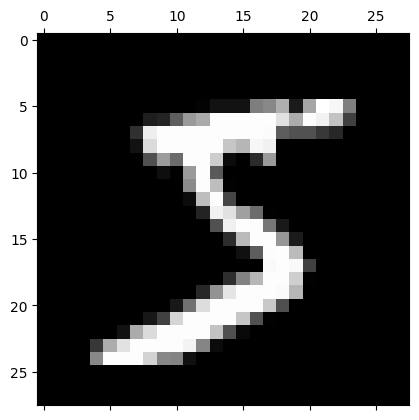

In [139]:
plt.matshow(train_images[0], cmap = 'gray')

In [140]:
# let us see the first label 
print(train_labels[0])
print(train_labels[0:10])


5
[5 0 4 1 9 2 1 3 1 4]


## Data preprocessing 

### One-Hot Encoding
* One-Hot Encoding is a technique used to represent the categorical data into Numerical format, particulary in Deep learning and Machine learning tasks 
* It converts the categorical variables into the binary vector with all eliments set to 0 ( zero ) except category index which set to 1 ( one )

In [141]:
train_labels_encoded = tf.keras.utils.to_categorical(train_labels)
test_labels_encoded  = tf.keras.utils.to_categorical(test_labels)

Let us take a look encoeded worked or not by checking the shapes of the encoded labels and printong them 

In [142]:
print(train_labels_encoded)
print(train_labels_encoded.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


In [143]:
print(test_labels_encoded)
print(test_labels_encoded.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10)


### Flattening the Images

let us fletten the given 60,000 (28X28) pixel images into 1D vector . for flettening the images into 1D array we wiil use Numpy's `reshape()` function 

In [144]:
len_train_images = len(train_images)
len_train_images


60000

In [145]:
# flattening the trainig images into 1D array
train_images_flattend = np.reshape(train_images, (len_train_images, 28*28))

# take a look at first flattend training image
print(train_images_flattend[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [146]:
# lenth of the test images 
len_test_images = len(test_images)

len_test_images

10000

In [147]:
# lenth of the test images 
len_test_images = len(test_images)

# flatten the test imgaes into 1D arrays 
test_images_flattend = np.reshape(test_images, (len_test_images, 28*28))

# take a look at first flattend image 
print(test_images_flattend[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

Let us take a look at set of pixel values  firdt trainig image and test image 

In [148]:
# set of pixel values  firdt trainig image
print(set(train_images_flattend[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [149]:
# set of pixel values  firdt test image
print(set(test_images_flattend[0]))

{0, 129, 1, 3, 133, 5, 9, 140, 14, 17, 18, 19, 21, 22, 151, 159, 31, 163, 36, 35, 166, 38, 40, 170, 44, 52, 182, 185, 58, 59, 60, 187, 62, 57, 61, 66, 67, 198, 72, 75, 203, 205, 77, 207, 209, 83, 84, 219, 221, 222, 224, 225, 121, 227, 126, 229, 233, 106, 236, 238, 240, 241, 114, 115, 242, 248, 249, 250, 251, 253, 254, 255}


## Normalization
* Above sets of the pixel values suggesting that the original pixel values of the images are tipically in the ranhe of [0,255]. 
* It is fine if we want to visualize the image but for nueral network to learn the weights , computation simply much more uneffective.
* computation simply much more effective and fast if we `Normalize` the pixel values of the  both training images and test images  

Noramlization is common data preprocessing process in machine learning, scaling the numerical data to a standard range [0,1] making it easier and faster for Nueral Network to learn from the data 

The two most common methods of the Normalization are:

* `Z-score Normalization (Standardization)`: It is a process of scalling the data to have `mean of 0` and `standard diviation of 1` using the formula 
$$ X_normalized = (X - X_mean) / X_std $$
*  `Mini-Max Normalization`: It is also a preocess of scalling the data to a fixed range [0,1] sung formula 
$$ X_normalized = (X - X_min) / (X_max - X_min)$$

Therefore, let us Normalize the trainig and test set of images's pixel values 

In [150]:
mean = np.mean(train_images_flattend)           # calculate the mean value 
std_diviation = np.std(train_images_flattend)   # caclutare the standard diviation value    

In [151]:
print("The Mean of data is = ", mean)
print("The standrd diviatin of data is = ", std_diviation)

The Mean of data is =  33.318421449829934
The standrd diviatin of data is =  78.56748998339798


In [152]:
epsilon = 1e-10
norm_train_images = ( train_images_flattend - mean )/ (std_diviation + epsilon)
norm_test_images = ( test_images_flattend - mean ) / (std_diviation+ epsilon)

In [153]:
print(set(norm_test_images[0]))
print(set(norm_train_images[0]))

{-0.4240738943910262, 0.6450706082224981, 1.4978406281642376, 1.930589593507807, 1.5996639141274305, 0.3396007503329197, 2.4015222910875735, 2.8088154349403447, 2.6433525952501564, 2.096052433197995, 1.7396709323268205, 0.4286961255507134, -0.20769941171924156, -0.19497150097384247, 2.73244797046795, 2.3887943803421745, 2.3633385588513764, 0.13595417840653412, 1.1160033058022647, 0.4923356792777089, -0.15678776873764516, 0.059586713934139515, -0.14405985799224608, 1.17964285952926, 0.5305194115139061, 2.465161844814569, 2.439706023323771, 2.7579037919587486, 2.490617666305367, 2.7960875241949457, 2.8215433456857437, 2.7451758812133495, 2.7706317027041476, 2.1596919869249906, 2.426978112578372, 1.2178265917654574, 0.2377774643697269, 0.5559752330047044, -0.41134598364562713, -0.18224359022844336, 0.9250846446212782, -0.38589016215482896, 0.02140298169794222, -0.029508661283654175, 1.8924058612716097, 2.579713041523161, 2.2360594513973853, 2.5415293092869637, -0.36043434066403074, 2.1851

Note : We have added a small value to the denominator because if the standard diviation close to zero then there may be chance to get bigger pixel values of the images which unstisfies the nomalization goal 

## Data Visualization 
Let us visualize the images present in the MNIST data set
* `imshow()`: This function is used to display an image. It takes the image data as input and displays it on the plot.
* `cmap = 'gray'`: The cmap argument sets the colormap to be used when displaying the image. In this case, 'gray' indicates that the image will be displayed in grayscale, which is suitable for visualizing the MNIST digits

* `np.random.choice()`: This function randomly samples elements from the test dataset `test_images` 3D array containig 10,000 images.
* `len(test_images)`: Returns the total number of samples in the test dataset. Since `test_images` is a 3D NumPy array, len(`test_images`) represents the number of samples or images in the test dataset.
* `num_samples_to_visualize`: This variable represents the number of random samples we want to visualize. It's usually set to a small number for a concise visualization.
* `replace=False`: This argument ensures that the selected indices are unique, meaning each image is selected only once. If replace=True, the same image can be chosen multiple times, creating a sample with duplicates.
* The `subplot()` function takes three arguments: num_rows, num_columns, and plot_number. These arguments define the arrangement of subplots in the grid and which specific subplot to work with.

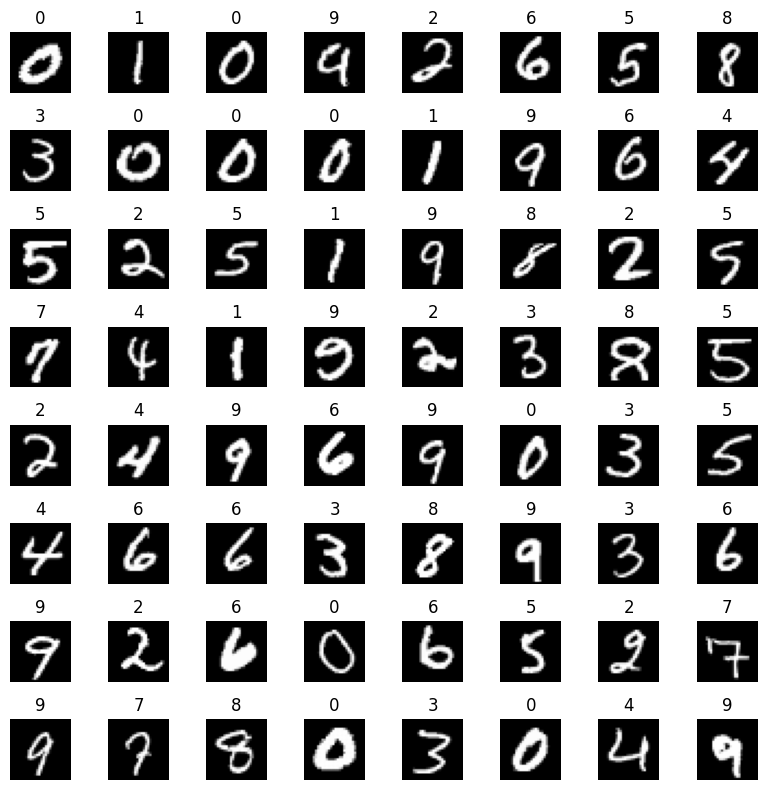

In [154]:
# Plot some sample images and their corresponding predicted labels
num_samples_to_visualize = 64

# make a list of image indices from where random selectiopn has been done 
sample_indices = np.random.choice(len(test_images), num_samples_to_visualize, replace=False)

plt.figure(figsize=(8, 8))

for i, idx in enumerate(sample_indices): # for loop iteration for getting both inedex(i) and index value
    
    # arrange plots side by side 
    plt.subplot(8, 8,  i + 1)
    
    plt.imshow(train_images[idx], cmap='gray')
    
    # make a title with image lable
    plt.title(train_labels[idx])
    
    # remove the axis of image 
    plt.axis('off')  
    
plt.tight_layout()

plt.show()

#### ReLU Activation

Before we procees further let us discuss about a new Activation function called `Rectified Linear Unit` 
* RelU activation function is one of the most commonly used activation functions in `Nueral Network`
* It is a linear function that returns the input value if it is positive and zero otherwise.

Mathematical definition of the ReLU activation function is :
$$a = max(0,z)$$
where $$z = W[i].x[i] + b[i]$$

#### Softmax Activation 
* A softmax function is a activation function used in the output layer of the nueral network for multiple classification problem
* It coverts the output scores of a nueral network into the probability distribution


The softmax function can be written:

$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$


Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.

## Build Tensorflow Model

We use a `Sequential([])` class defined in `tensorflow.keras.model` to create the model. All the layers are going to be `Dense` layers because all the nodes in one layer connected to the all the nodes in preceeding layer.

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [156]:
# Build a simple nueral network with ReLU, softmax activation functions  
model = Sequential([
    
    tf.keras.Input(shape = (784,)),
    
    Dense(units = 128, activation = 'relu'),   # first hidden layer with Relu Activation function 
    Dense(units = 128, activation = 'relu'),   # Second hidden layer with Relu activation function 
    Dense(units = 10, activation = 'softmax') # Output layer with softmax activation function 
    
])

Let us understand the code above. first we initiated a model using the `Sequential()` function. We pass a list of the layers that we want in our model. So we have two hidden layers with 25 noeds each and one is output layer with 10 nodes. before passing the list of the layers, we must specify the shape of a single image using `Input()`. We know that the shape of a single image is 784 ie. 784 dimensional column vector 



## Compile the model


In Order to compile our model, we need to define which algorothm should the Neural Network model use in order to `optimize the weights and biases as per the given data`. 

To compile the model usung `model.compile()`. The compilation step  needs the loss function , optimizer and evaluation metrics

* `optimizer ='adam'`: Adam is an optimization algorithem used for update the models weights during the trainig of the model based on the gradient of the loss function 
* `loss = 'SparseCategoricalCrossentropy'` : SparseCategoricalCrossentropy is a common loss function used for multiclass classification
* `metrics=['accuracy']`: The model will be evaluated based on accuracy during training.

In [157]:
# Compile the model 

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [158]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Train the model

Now train the model with the trainig images `(train_images , train_labels)`. fot traing the model we will use the `fit()` function 

* `batch_size=32`: The batch size specifies the number of samples that will be propagated through the network in each training step. Smaller batch sizes require less memory but might take more time to train.

* `epochs=10`: The number of epochs determines how many times the entire training dataset will be passed through the network during training.

* `validation_split = 0.2`: validation_split specifices the proportion of the training data set to be used as validation set to monitor the model's performance during the training 

In [159]:
# Trainig the model 
history = model.fit(norm_train_images, train_labels_encoded, epochs = 3, batch_size=32)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2129 - accuracy: 0.9348
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1026 - accuracy: 0.9683
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9761


## Evaluate the model 

#### `Why do we need to evaluate the performance of the trained  model on the test set of data ?`

Evaluating the performance of the trained model on the test set of data is a critical step in the Machine learning and Deep learning. It serves several important purposes.

* `Asses Generalization`: As we know that the primary goal of any ML model is to generalize well on unseen data, meaning it should perform well on the new set of data that it never seen before. Evaluating the model's performance on the new data or test set of data helps us to detremine whether the model works well on the new data( unseen data )
* `Avoiding Overfitting`: `When do we see the concept of Overfitting ?` Well, Overfitting occures when a model performs well on the trainig set of data but poorly on new or unseen set of data. So, to check whether the model has overfit the trainig data or Not, we can evaluate the model's performance on the test set of data. if the performance of a model on the test data is significantly worse than the trainig performance, it indicates the `Overfitting`. `Regularization` techniques may be required further 

#### `How do we evaluate the trained model's performance ?`

* `model.evaluate()` will be used to evaluate the model on test set of data it takes the following arguments
* `test_images_flattend`: It is an array of flattend test images to be evaluated by the  model  
* `test_labels_enncdoed`: It is an array of corresponding encoded test labels 
* `verbose` : An optional argument that controls the verbosity during evaluation. A value of 0 means silent, 1 means progress bar, and 2 means one line per epoch.

The `model.evaluate()` returns two values 
* `test_loss` : An average loss values computed over the entire test data set. This represents the performance of the model interms of How well it predicts the test data
* `test_accuracy`: It represents the percentage of correctly predicted lables. It provides an estimation of how accuratly the models predicting the lables on the unseen data. High test_accuracy idicates that the model performing well on new, unseen data 


In [160]:
test_loss , test_accuracy = model.evaluate(norm_test_images, test_labels_encoded)

313/313 [==============================] - 1s 1ms/step - loss: 0.0937 - accuracy: 0.9718


In [161]:
print(test_loss)
print(test_accuracy*100)

0.0937216579914093
97.18000292778015


## Predictions

In [162]:
predicts = model.predict(norm_test_images)

313/313 [==============================] - 0s 1ms/step


In [163]:
print(predicts[0])


[2.8844275e-07 8.5855863e-05 1.3579668e-05 1.0096664e-05 1.5193761e-09
 1.1350739e-05 4.0159909e-10 9.9937832e-01 5.9954286e-06 4.9454346e-04]


In [164]:
predicts.shape

(10000, 10)

Here, `model.predict()` function returns the `2D array` with each row represents the 1D array of probabilities of each image that we have provided as input and each element in the 1D array represents the  probality of each class 

For example : `predicts[0]` contains  `[5.6128090e-07 1.2025633e-07 1.0591659e-06 3.1808647e-06 2.0177007e-08`
 `4.8372288e-09 3.8234893e-10 9.9999344e-01 1.6913636e-07 1.3924333e-06]` which means that the model predicting the fist image with probabilities as follows

 * Probability of belonging to class 0 : 5.6128090e-07
 * Probability of belonging to class 1 : 1.2025633e-07
 * Probability of belonging to class 2 : 1.0591659e-06
 * Probability of belonging to class 3 : 3.1808647e-06
 * Probability of belonging to class 4 : 2.0177007e-08
 * Probability of belonging to class 5 : 4.8372288e-09
 * Probability of belonging to class 6 : 3.8234893e-10
 * Probability of belonging to class 7 : `9.9999344e-01`
 * Probability of belonging to class 8 : 1.6913636e-07
 * Probability of belonging to class 8 : 1.3924333e-06

The class with the `Highest probability` is the predicted class for fist image  which is `7`.

* `tf.argmax(predicts, axis = 1)` will be used to get the `index` of  `Highest probability` 
 


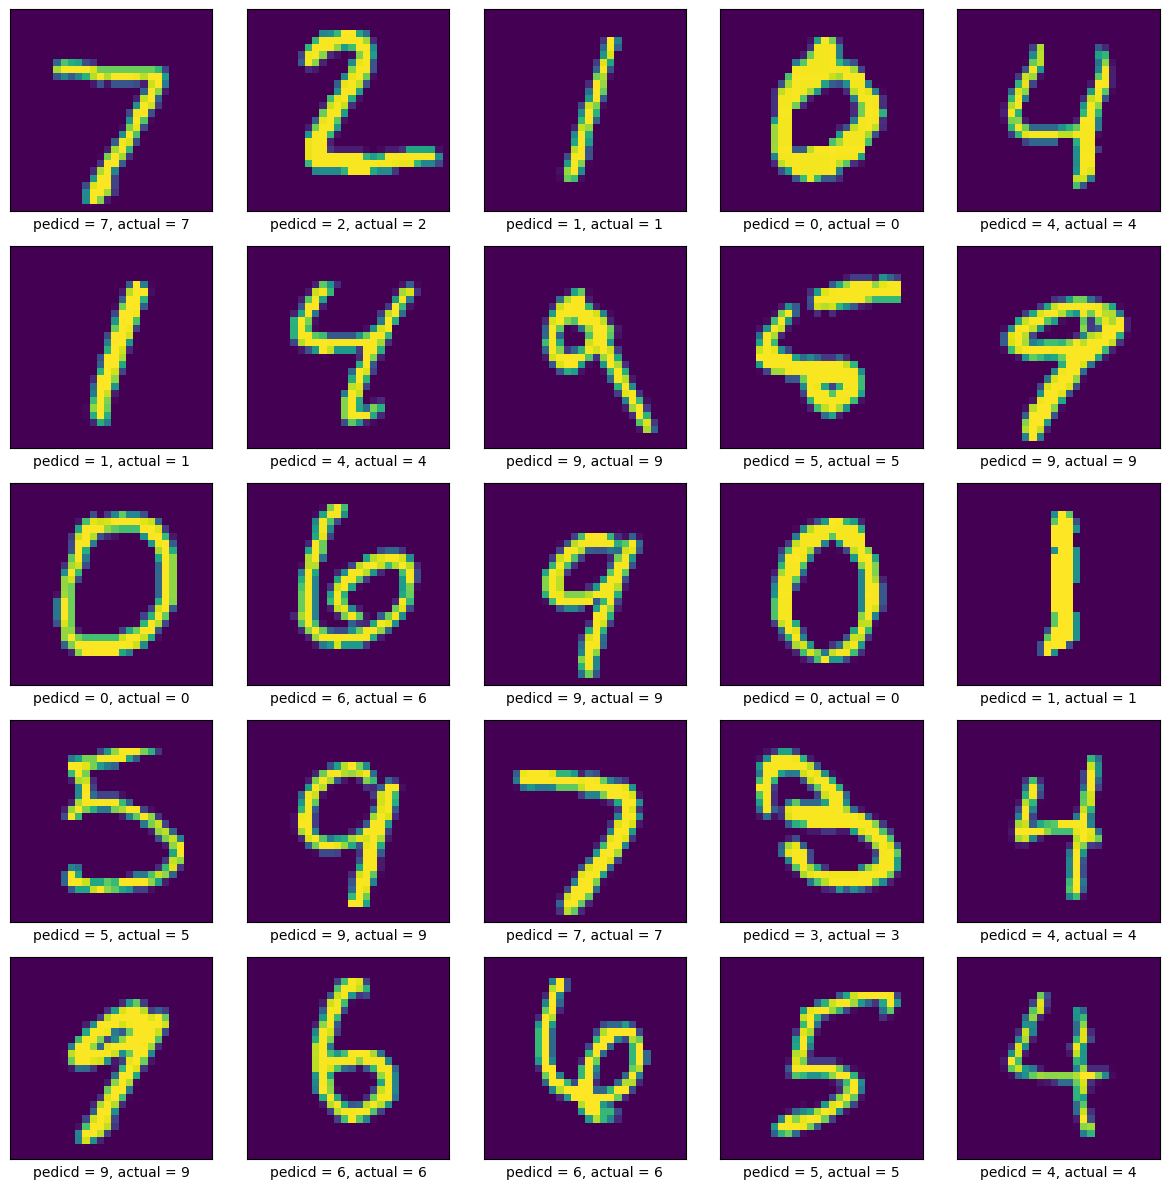

In [172]:
plt.figure(figsize=(12,12))

for i in range(25):
    
    # make a subplots side by side 
    plt.subplot(5, 5, i+1)
    
    # remove the x-axis ticks of a plot
    plt.xticks([])
    
    # remove the y-axis ticks of a plot
    plt.yticks([])
    
    # access each row from 2D ayyay of 'predicts'
    prob_row = predicts[i]
    
    # access the index of highes probility ( predicted class lable)
    predicted_image= np.argmax(prob_row)
    
    actual_image= np.argmax(test_labels_encoded[i])
    
    plt.imshow(test_images[i])
    
    col = 'black'
    
    if predicted_image != actual_image :
        col = 'r'
    
    plt.xlabel("pedicd = {}, actual = {}".format(predicted_image,actual_image), color = col)
    
plt.tight_layout()
plt.show()
    

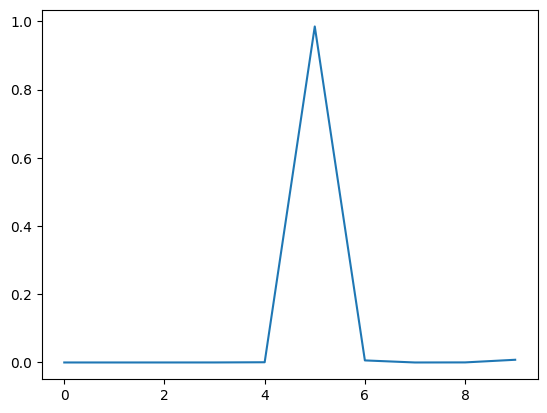

In [171]:
plt.plot(predicts[8])
plt.show()